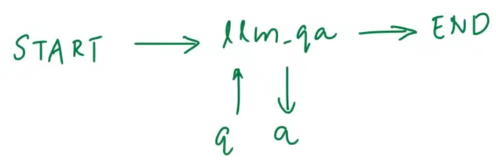

In [15]:
from langgraph.graph import StateGraph, START, END

from langchain_openai import ChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv


In [16]:
load_dotenv()

True

In [17]:
model = ChatOpenAI()

In [18]:
# create a state

class LLMState(TypedDict):
    
    question : str
    answer  : str

In [19]:
def llm_qa(state : LLMState) -> LLMState:
    
    # extract question from state
    question = state['question']
    
    
    # form a prompt
    prompt = f'Answer the following question {question}'
    
    # ask that question to LLM
    answer= model.invoke(prompt).content
    
    # updat ethe answer to state
    state['answer'] = answer
    
    return state

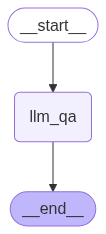

In [20]:
# create the graph

graph = StateGraph(LLMState)


# add nodes

graph.add_node('llm_qa', llm_qa)

# add edges

graph.add_edge(START, 'llm_qa')
graph.add_edge('llm_qa', END)

# compile
graph.compile()

In [21]:
workflow = graph.compile()

In [24]:
# execute

initial_state = {'question': 'What is the distance between bangalore and Hyderabad in kilometers?'}

final_state = workflow.invoke(initial_state)

print(final_state['answer'])

The distance between Bangalore and Hyderabad is approximately 569 kilometers.
